In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load the dataset
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

In [ ]:
# Data preprocessing
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

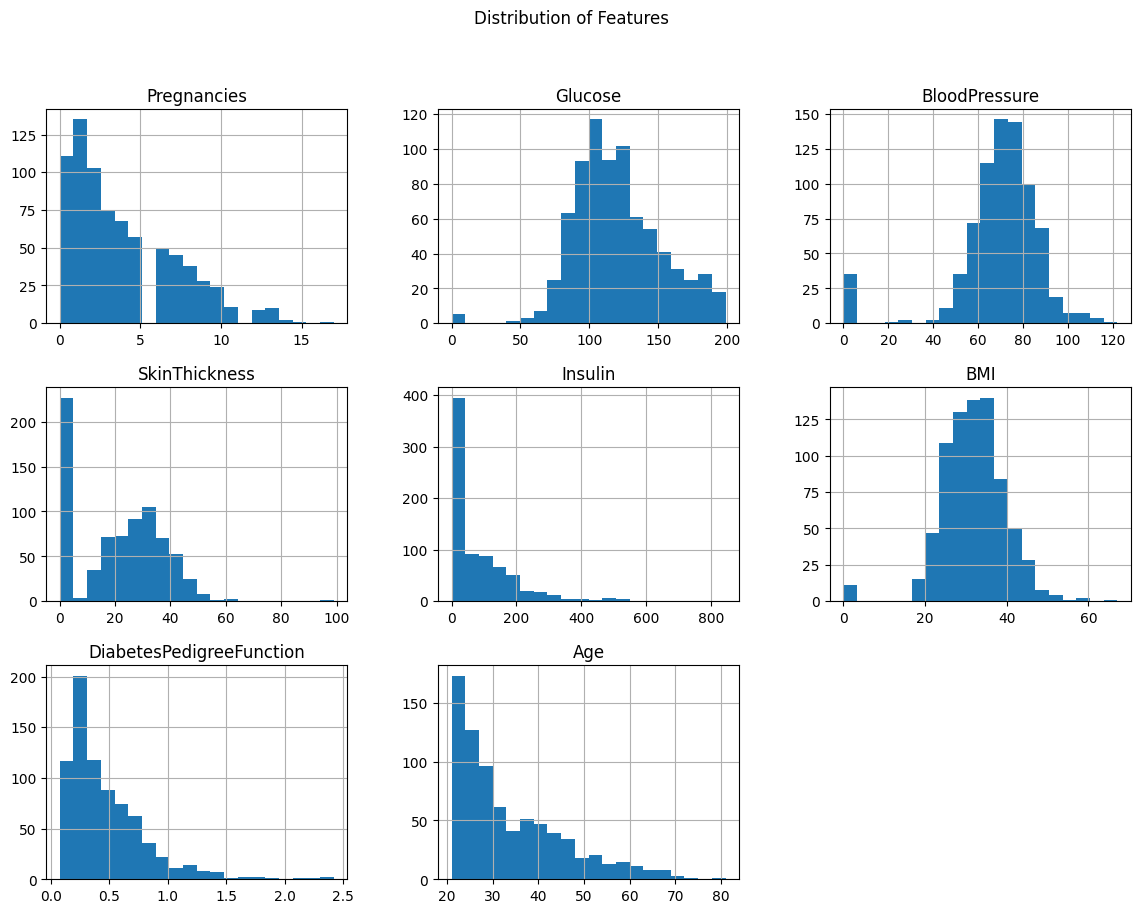

In [ ]:
# Plot histogram for each feature in the dataset
df.drop("Outcome", axis=1).hist(bins=20, figsize=(14,10))
plt.suptitle('Distribution of Features')
plt.show()



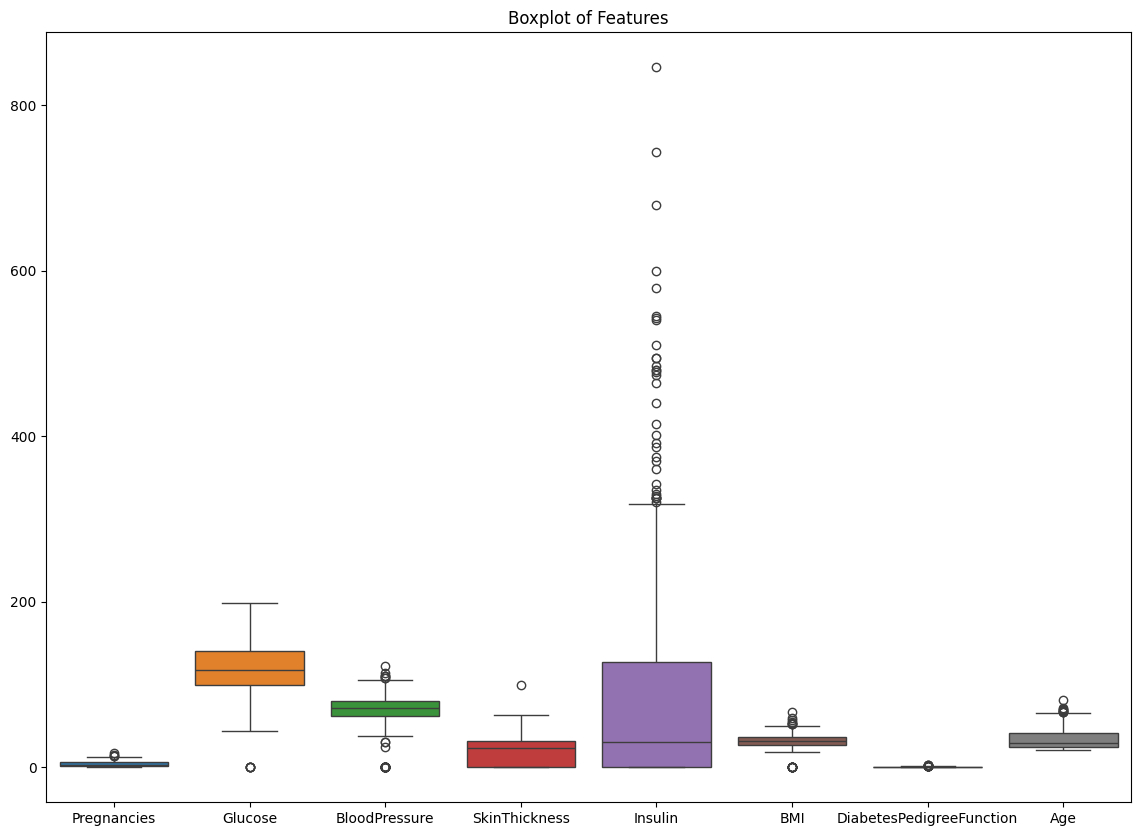

In [ ]:
# Boxplot for each feature
plt.figure(figsize=(14,10))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.title('Boxplot of Features')
plt.show()

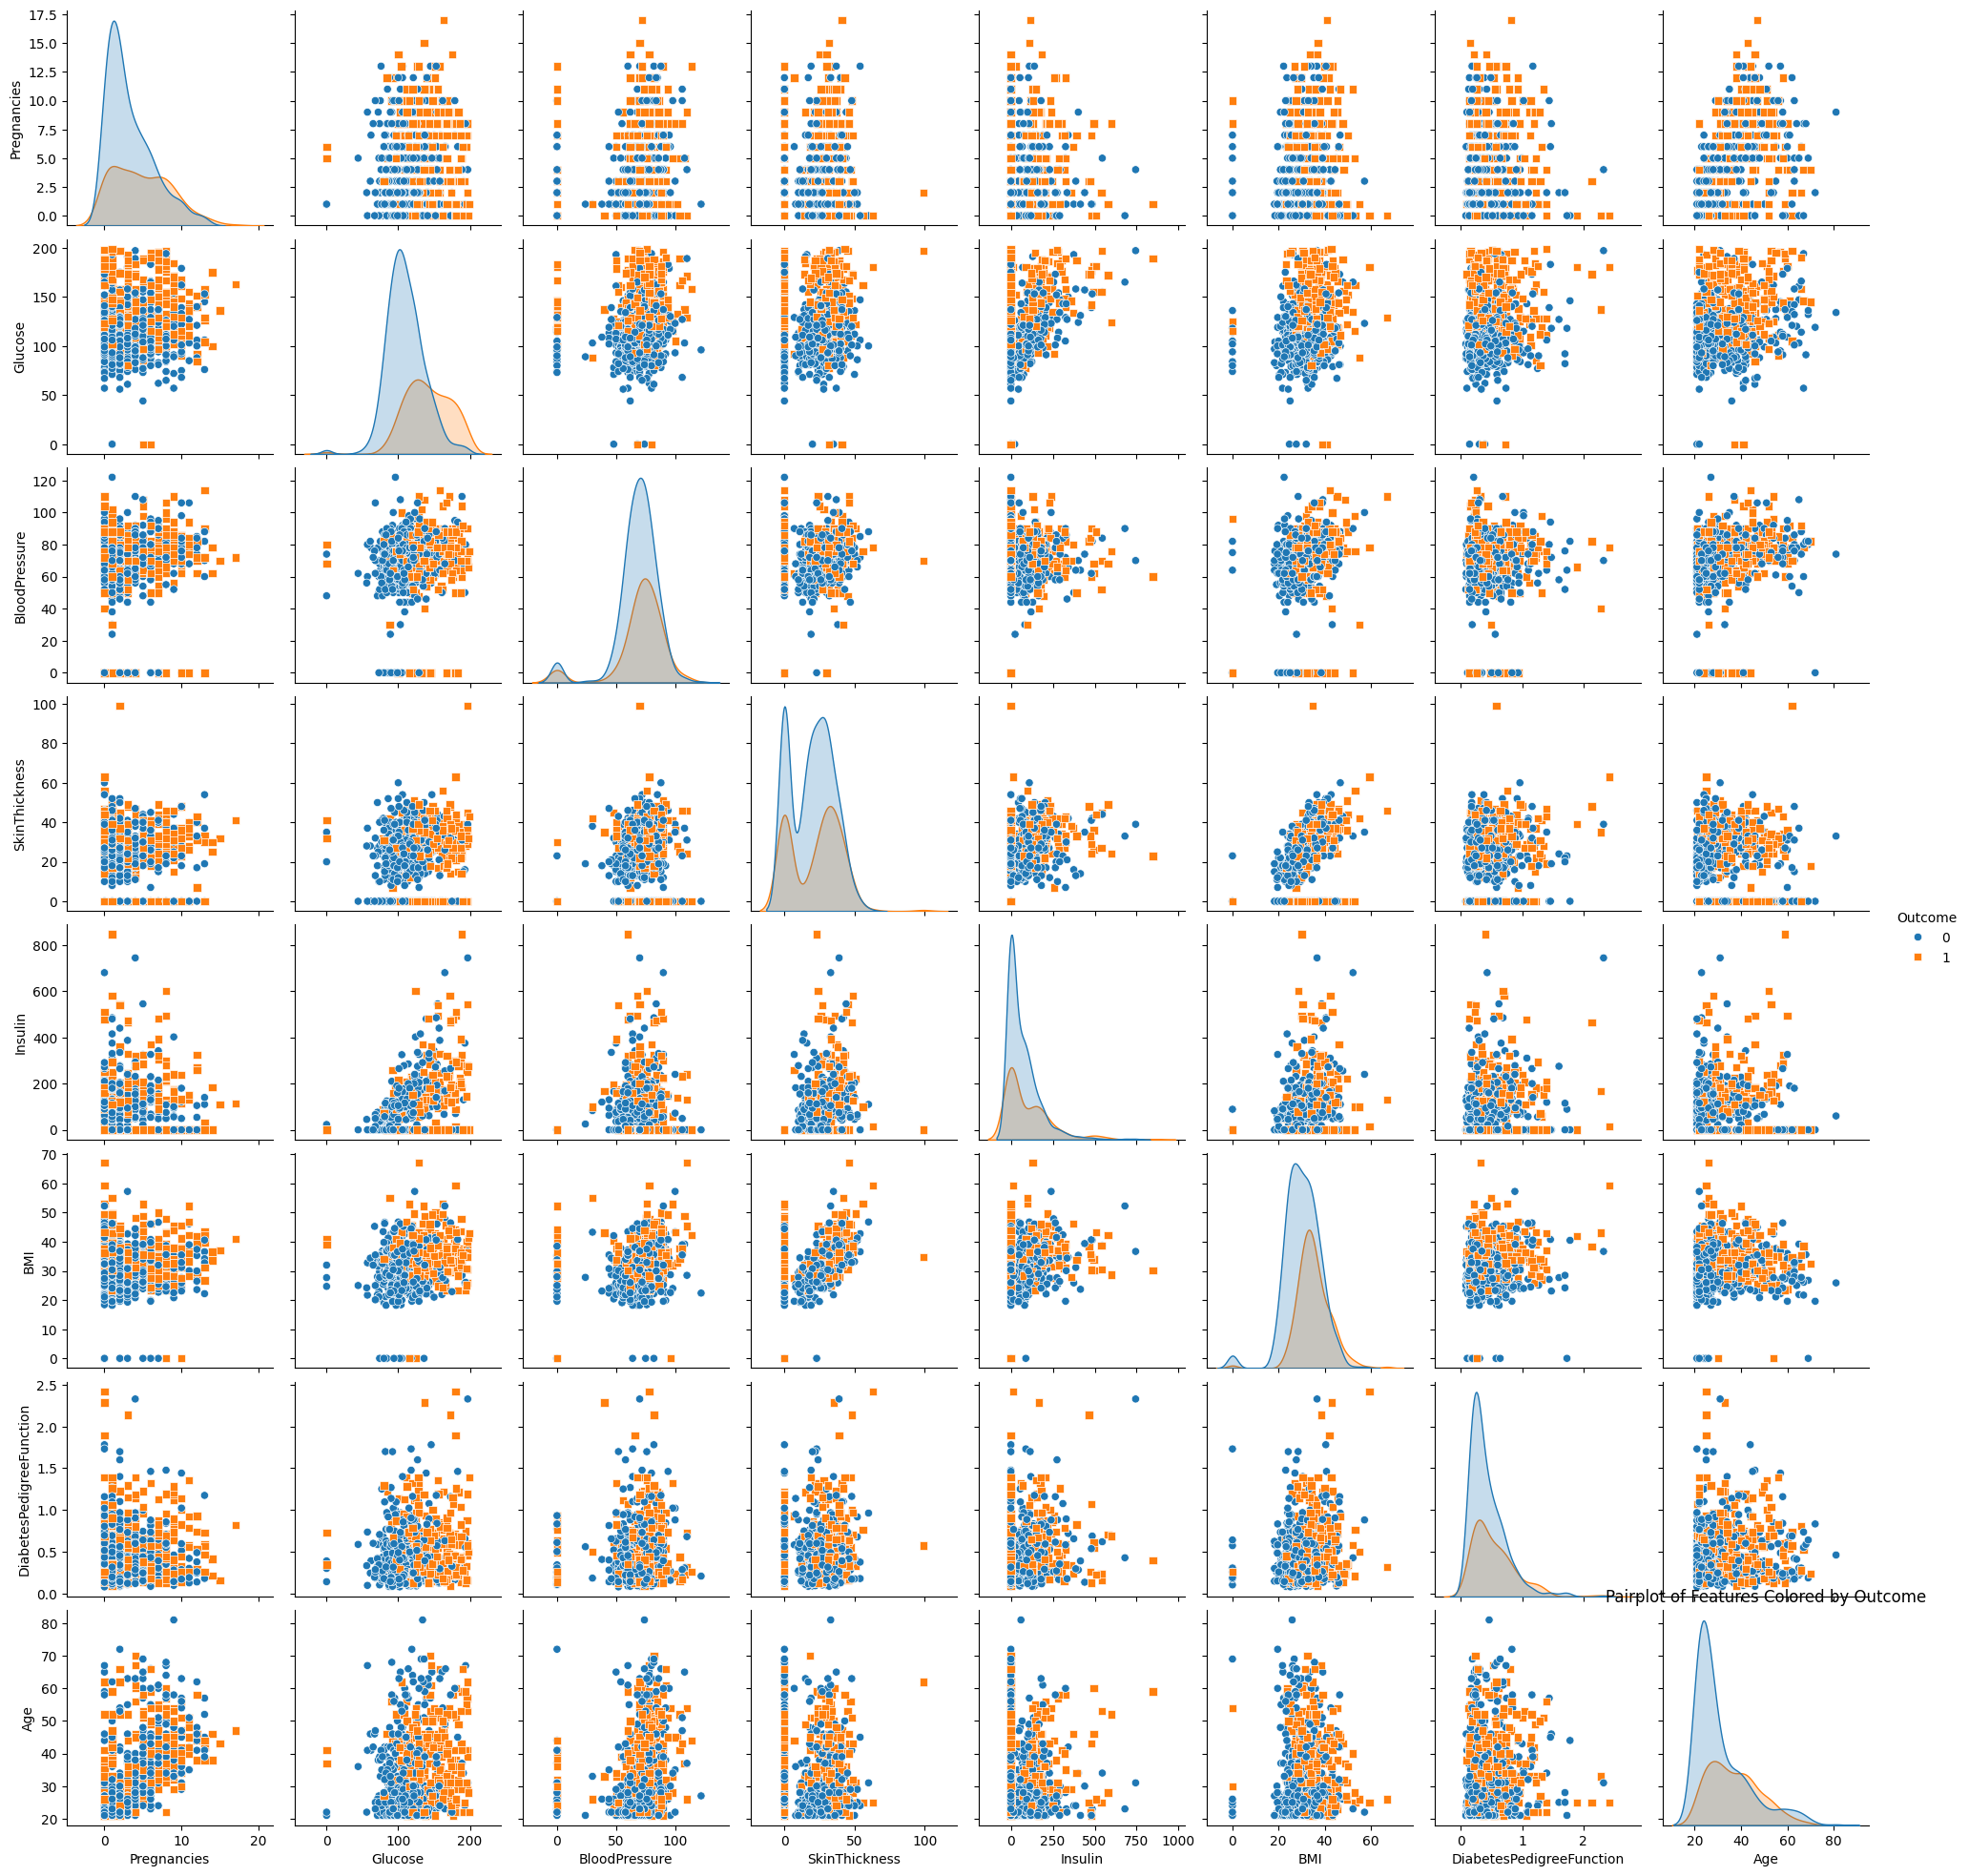

In [ ]:

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.title('Pairplot of Features Colored by Outcome')
plt.show()

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [ ]:
# Accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
cv_score_rf = cross_val_score(rf_model, X_scaled, y, cv=5).mean()

# Print the results
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest Cross-Validation Accuracy: {cv_score_rf:.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.7576
Random Forest Cross-Validation Accuracy: 0.7657


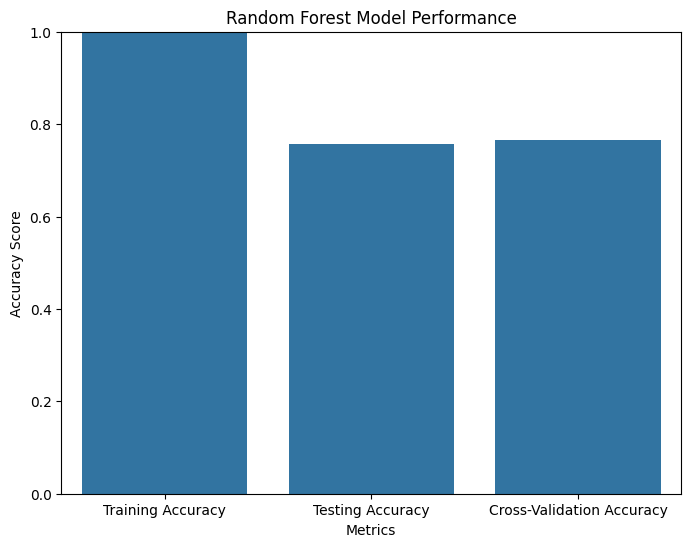

In [ ]:
metrics_df = pd.DataFrame({
    'Metrics': ['Training Accuracy', 'Testing Accuracy', 'Cross-Validation Accuracy'],
    'Values': [train_accuracy_rf, test_accuracy_rf, cv_score_rf]
})

# Bar plot for accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x='Metrics', y='Values', data=metrics_df)
plt.title("Random Forest Model Performance")
plt.ylabel("Accuracy Score")
plt.xlabel("Metrics")
plt.ylim(0, 1)  # Ensure the scale is between 0 and 1
plt.show()

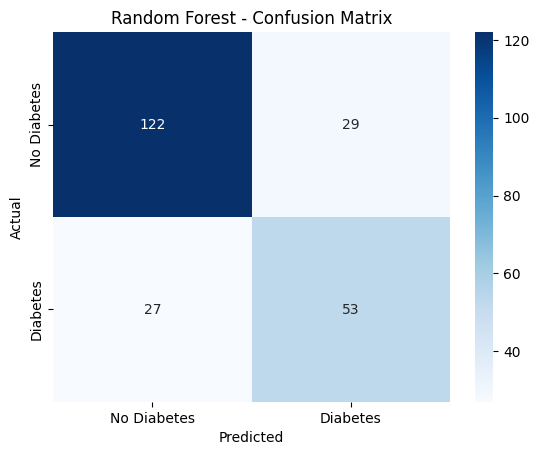

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231

